In [ ]:
import pandas as pd
!git clone https://github.com/arditolaksono/CardanoPredictionLSTM.git

Cloning into 'CardanoPredictionLSTM'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
df = pd.read_csv('./CardanoPredictionLSTM/ADA-USD.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-03,1.196326,1.244183,1.171635,1.173277,1.173277,3355350115
1,2021-04-04,1.172973,1.199748,1.166279,1.191420,1.191420,2166855014
2,2021-04-05,1.191552,1.226746,1.176512,1.214300,1.214300,2992739340
3,2021-04-06,1.214279,1.340895,1.195389,1.255354,1.255354,6301229657
4,2021-04-07,1.255457,1.291087,1.165118,1.175149,1.175149,4771395490


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2022-03-30,1.190980,1.216669,1.167608,1.190385,1.190385,1424442312
362,2022-03-31,1.190299,1.226320,1.137162,1.141851,1.141851,1745903089
363,2022-04-01,1.141952,1.172973,1.107619,1.165425,1.165425,1687785845
364,2022-04-02,1.165444,1.193844,1.151050,1.156007,1.156007,1224117012
365,2022-04-03,1.156855,1.173538,1.146823,1.169506,1.169506,1166448128


In [ ]:
df2 = df.reset_index()['Close']

In [ ]:
df2.head()

0    1.173277
1    1.191420
2    1.214300
3    1.255354
4    1.175149
Name: Close, dtype: float64

In [ ]:
df2.shape

(366,)

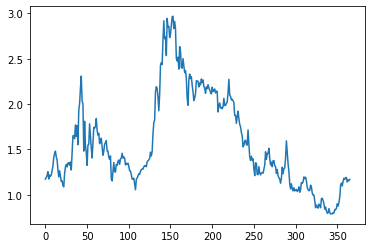

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [ ]:
df2

array([[1.75909985e-01],
       [1.84239668e-01],
       [1.94744169e-01],
       [2.13592585e-01],
       [1.76769444e-01],
       [1.97102172e-01],
       [1.89804115e-01],
       [1.96790893e-01],
       [2.18817748e-01],
       [2.41494247e-01],
       [2.85412517e-01],
       [3.05445445e-01],
       [3.17459509e-01],
       [2.87782917e-01],
       [2.73054578e-01],
       [2.22842331e-01],
       [1.87241806e-01],
       [2.18449998e-01],
       [1.91270980e-01],
       [1.63853683e-01],
       [1.67841077e-01],
       [1.42889674e-01],
       [1.36873001e-01],
       [2.03797414e-01],
       [2.37270409e-01],
       [2.50464852e-01],
       [2.37769465e-01],
       [2.58170142e-01],
       [2.58455710e-01],
       [2.46399867e-01],
       [2.62568901e-01],
       [2.22204164e-01],
       [3.14677744e-01],
       [3.94836542e-01],
       [3.96364929e-01],
       [3.80801464e-01],
       [4.50131169e-01],
       [3.92344478e-01],
       [4.47153822e-01],
       [3.50142371e-01],


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [ ]:
training_size,test_size

(237, 129)

In [ ]:
train_data

array([[0.17590998],
       [0.18423967],
       [0.19474417],
       [0.21359259],
       [0.17676944],
       [0.19710217],
       [0.18980411],
       [0.19679089],
       [0.21881775],
       [0.24149425],
       [0.28541252],
       [0.30544545],
       [0.31745951],
       [0.28778292],
       [0.27305458],
       [0.22284233],
       [0.18724181],
       [0.21845   ],
       [0.19127098],
       [0.16385368],
       [0.16784108],
       [0.14288967],
       [0.136873  ],
       [0.20379741],
       [0.23727041],
       [0.25046485],
       [0.23776946],
       [0.25817014],
       [0.25845571],
       [0.24639987],
       [0.2625689 ],
       [0.22220416],
       [0.31467774],
       [0.39483654],
       [0.39636493],
       [0.38080146],
       [0.45013117],
       [0.39234448],
       [0.44715382],
       [0.35014237],
       [0.52501522],
       [0.55767099],
       [0.63536711],
       [0.69738682],
       [0.57026446],
       [0.55715036],
       [0.31788786],
       [0.468

In [ ]:
test_data

array([[3.38960679e-01],
       [3.47086057e-01],
       [3.68543612e-01],
       [3.72975427e-01],
       [3.51119363e-01],
       [3.47818342e-01],
       [4.24789979e-01],
       [3.51877817e-01],
       [2.89507804e-01],
       [2.69949139e-01],
       [2.91659665e-01],
       [2.71710296e-01],
       [2.78658050e-01],
       [2.29701017e-01],
       [1.93545425e-01],
       [2.58996086e-01],
       [2.55797906e-01],
       [1.99816447e-01],
       [1.98662696e-01],
       [2.39529244e-01],
       [2.06788534e-01],
       [1.97311527e-01],
       [2.07706759e-01],
       [2.08683292e-01],
       [2.05735329e-01],
       [2.25302257e-01],
       [2.46964117e-01],
       [3.14293008e-01],
       [2.76497006e-01],
       [3.04561653e-01],
       [3.05732390e-01],
       [3.31841217e-01],
       [2.81040845e-01],
       [2.48237236e-01],
       [2.61827434e-01],
       [2.38777217e-01],
       [2.69430342e-01],
       [2.69709942e-01],
       [2.44023958e-01],
       [2.39442472e-01],


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

(206, 30)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
print(X_train)

[[[0.17590998]
  [0.18423967]
  [0.19474417]
  ...
  [0.25817014]
  [0.25845571]
  [0.24639987]]

 [[0.18423967]
  [0.19474417]
  [0.21359259]
  ...
  [0.25845571]
  [0.24639987]
  [0.2625689 ]]

 [[0.19474417]
  [0.21359259]
  [0.17676944]
  ...
  [0.24639987]
  [0.2625689 ]
  [0.22220416]]

 ...

 [[0.63205599]
  [0.61213968]
  [0.62161163]
  ...
  [0.49339383]
  [0.51953709]
  [0.48190223]]

 [[0.61213968]
  [0.62161163]
  [0.61918339]
  ...
  [0.51953709]
  [0.48190223]
  [0.45288263]]

 [[0.62161163]
  [0.61918339]
  [0.51563509]
  ...
  [0.48190223]
  [0.45288263]
  [0.44092183]]]


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=5,verbose=1)


Epoch 1/100
42/42 [==============================] - 18s 202ms/step - loss: 0.0481 - val_loss: 0.0093
Epoch 2/100
42/42 [==============================] - 4s 96ms/step - loss: 0.0205 - val_loss: 0.0136
Epoch 3/100
42/42 [==============================] - 5s 114ms/step - loss: 0.0117 - val_loss: 0.0059
Epoch 4/100
42/42 [==============================] - 3s 80ms/step - loss: 0.0090 - val_loss: 0.0067
Epoch 5/100
42/42 [==============================] - 2s 58ms/step - loss: 0.0092 - val_loss: 0.0042
Epoch 6/100
42/42 [==============================] - 2s 58ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 7/100
42/42 [==============================] - 2s 57ms/step - loss: 0.0067 - val_loss: 0.0100
Epoch 8/100
42/42 [==============================] - 2s 56ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 9/100
42/42 [==============================] - 2s 57ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 10/100
42/42 [==============================] - 2s 57ms/step - loss: 0.0074 - val_loss: 0.0

In [ ]:
import tensorflow as tf


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.4270132296220022

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.9997752217005231

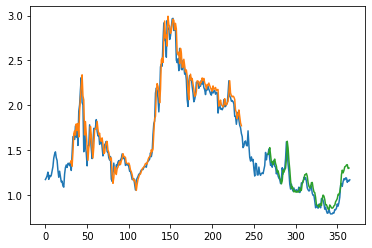

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

129

In [ ]:
x_input=test_data[99:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.0346845941029717,
 0.015438585859142429,
 0.0033304041937198825,
 0.005107629811846426,
 0.027164785681557557,
 0.0074334952165038826,
 0.0,
 0.0002520529228497992,
 0.0003994281291062052,
 0.006332083628313334,
 0.004536493498503769,
 0.022151733104878835,
 0.02142174376547784,
 0.029065512640752522,
 0.05094958298785096,
 0.03992766218848054,
 0.05814984890598013,
 0.08553959985565496,
 0.14570265835488871,
 0.15604601044757083,
 0.14129793022771076,
 0.1654959290468726,
 0.1799827740880413,
 0.1744899486436431,
 0.1840982611562113,
 0.18376448615637198,
 0.1614819059057515,
 0.172305030866153,
 0.16798110659038057,
 0.1741786701706155]

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.23685698]
31
1 day input [0.01543859 0.0033304  0.00510763 0.02716479 0.0074335  0.
 0.00025205 0.00039943 0.00633208 0.00453649 0.02215173 0.02142174
 0.02906551 0.05094958 0.03992766 0.05814985 0.0855396  0.14570266
 0.15604601 0.14129793 0.16549593 0.17998277 0.17448995 0.18409826
 0.18376449 0.16148191 0.17230503 0.16798111 0.17417867 0.23685698]
1 day output [[0.2945397]]
2 day input [3.33040419e-03 5.10762981e-03 2.71647857e-02 7.43349522e-03
 0.00000000e+00 2.52052923e-04 3.99428129e-04 6.33208363e-03
 4.53649350e-03 2.21517331e-02 2.14217438e-02 2.90655126e-02
 5.09495830e-02 3.99276622e-02 5.81498489e-02 8.55395999e-02
 1.45702658e-01 1.56046010e-01 1.41297930e-01 1.65495929e-01
 1.79982774e-01 1.74489949e-01 1.84098261e-01 1.83764486e-01
 1.61481906e-01 1.72305031e-01 1.67981107e-01 1.74178670e-01
 2.36856982e-01 2.94539690e-01]
2 day output [[0.36411622]]
3 day input [5.10762981e-03 2.71647857e-02 7.43349522e-03 0.00000000e+00
 2.52052923e-04 3.99428129e-04 6.33208363e-03

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df2)

366

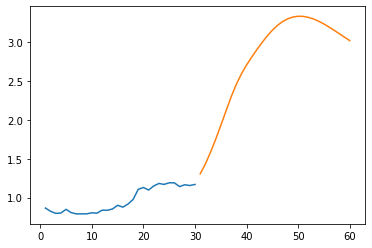

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2[336:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

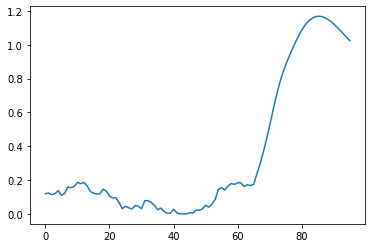

In [ ]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

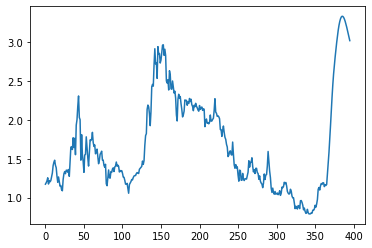

In [ ]:
plt.plot(df3)

In [ ]:
df3

[[1.173277],
 [1.19142],
 [1.2143],
 [1.2553540000000003],
 [1.175149],
 [1.219436],
 [1.20354],
 [1.218758],
 [1.266735],
 [1.316127],
 [1.411786],
 [1.45542],
 [1.481588],
 [1.416949],
 [1.384869],
 [1.275501],
 [1.197959],
 [1.265934],
 [1.206735],
 [1.147017],
 [1.1557020000000002],
 [1.101355],
 [1.08825],
 [1.234019],
 [1.306927],
 [1.335666],
 [1.308014],
 [1.352449],
 [1.353071],
 [1.326812],
 [1.36203],
 [1.274111],
 [1.475529],
 [1.650124],
 [1.653453],
 [1.619554],
 [1.770562],
 [1.644696],
 [1.764077],
 [1.552775],
 [1.933668],
 [2.004796],
 [2.174027],
 [2.309113],
 [2.032226],
 [2.003662],
 [1.482521],
 [1.810469],
 [1.552277],
 [1.463622],
 [1.325436],
 [1.549485],
 [1.555369],
 [1.782702],
 [1.64596],
 [1.511987],
 [1.406232],
 [1.577279],
 [1.742778],
 [1.734753],
 [1.752824],
 [1.840471],
 [1.710908],
 [1.659009],
 [1.678248],
 [1.564106],
 [1.58803],
 [1.624826],
 [1.531857],
 [1.436378],
 [1.48022],
 [1.558359],
 [1.57511],
 [1.597756],
 [1.482573],
 [1.482194],
 [1